<a href="https://colab.research.google.com/github/Pedro1-21GW/sigmoidal/blob/main/Projeto_1_Analisando_os_Dados_do_Airbnb_(Tokyo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="MyLogo" width="100%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/banner_atualizado.png">

# Análise dos Dados do Airbnb - Tokyo

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, sendo que ela **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

# Introdução

Considerada a terra dos samurais, dos *animes*, dos mangás e também um dos maiores centros financeiros do mundo, **Tokyo** é uma grande metrópole com população média estimada de 13.96 milhões de habitantes. 

Essa métropole com alta densidade populacional (cerca de 6158 pessoas por metro quadrado) é o principal centro político, financeiro, comercial, educacional e cultural do Japão, possuindo o turismo como contribuidor significativo para economia. Atraindo desde entusiastas de gastromia à fãs da cultura pop japonesa, Tokyo constantemente aparece no top 10 em rankings das localidades mais visitadas no mundo, atualmente se firmando na nona colocação no portal [TravelMedium](https://travelmedium.com/most-visited-cities-in-the-world). 






<center><img alt="Tokyo" width="100%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/japanese_culture.jpg"></center>





Apesar de possuir um grande fluxo de visitantes, a metrópole japonesa não é conhecida por uma localidade com custo acessível, por isso utilizar o Airbnb no Japão pode trazer: 


*   Preços mais acessíveis do que o setor hoteleiro tradicional oferece, especialmente para **grupos** de turistas. 
*  Alugar um imóvel pode trazer uma experiência mais "orgânica" e local para aproveitar o melhor de Tokyo.
* Além disso, existem opções de aluguéis que trazem mais conveniências, como uma cozinha ou ainda uma máquina de lavar, tornando a experiência ainda mais confortável. 


<center><img alt="Tokyo" width="100%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/tokyo-1.jpg"></center>

Caso você tenha dúvidas sobre a legalidade do Airbnb no Japão, **pode ficar tranquilo!**. Desde junho de 2018, a *startup* se adequou a uma série de normas impostas ao aluguel de imóveis privados pelo governo japonês, que integram a "Lei Minpaku". Para saber mais sobre as regulações impostas clique [aqui](https://notesofnomads.com/airbnb-in-japan/).  

 **Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**



## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame

DATAPATH = "https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/listings.csv"
df = pd.read_csv(DATAPATH)

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número gerado para identificação da reserva
* `name` - nome da propriedade anunciada.
* `host_id` - número gerado para identificação do proprietário/anfitrião da propriedade.
* `host_name` - nome do anfitrião.
* `neighbourhood_group` - esta coluna possui apenas valores ausentes.
* `neighbourhood` - nome do bairro.
* `latitude` - coordenada da latitude da propriedade.
* `longitude`- coordenada da longitude da propriedade.
* `room_type` - tipo do quarto oferecido.
* `price` - preço para o aluguel do imóvel.
* `minimum_nights` - quantidade mínima de noites para reserva.
* `number_of_reviews` - número de avalições que a propriedade possui.
* `last_review` - última avaliação.
* `reviews_per_month` - número de avaliações mensais do imóvel.
* `calculated_host_listings_count` - número de imóveis que o anfritrião possui na localidade da propriedade verificada.
* `availability_365` - disponibilidade anual do imóvel.
* `number_of_reviews_ltm` - número de avaliações da propriedade nos últimos 12 meses.
* `license` - Código de registro/permissão/licença para o aluguel.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,165,2019-11-14,1.50,1,363,0,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7816,3,228,2020-01-18,2.33,1,216,0,M130000243
2,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-04-15,0.78,2,270,0,M130007760
3,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69233,139.70851,Private room,14036,1,252,2020-02-12,2.73,3,365,1,M130002814
4,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,0.98,2,88,0,M130007760


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

 Em seguida, vamos identificar qual o tamanho do nosso *dataset*, observando o número de variáveis, número de  entradas e até os tipos de variáveis.
Além disso, vale mencionar que o conjunto de dados sendo utilizado é uma versão "resumida" do Airbnb. Na mesma página em que baixamos o arquivo `listings.csv`, estão disponíveis conjuntos mais completos, como o `listings.csv.gz`. 
Apesar disso, o *dataset* utilizado supre completamente a análise exploratória realizada aqui. 

In [ ]:
# identificar o volume de dados do DataFrame

print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")

# verificar as 5 primeiras entradas do dataset
print(df.dtypes)

Entradas:	 10670
Variáveis:	 18

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Qual a porcentagem de valores ausentes no *dataset*?**

> É **importantíssimo** tratar dos valores ausentes em nosso *dataset*, estando eles diretamente relacionados com a qualidade de nosso conjunto de dados. Vamos tentar entender logo de cara qual é a **relevância percentual desses valores ausentes** se comparados ao total de entradas.

Com isso, foi possível notar que:

*   A coluna `neighbourhood_group` possui 100% de entradas ausentes.
*   As variáveis `reviews_per_month` e `last_review` possuem praticamento 20% de entradas ausentes.



In [ ]:
# ordenar em ordem decrescente as variáveis pelos percentuais de seus valores ausentes
(df.isnull().sum().sort_values(ascending = False))/(df.shape[0])

neighbourhood_group               1.000000
reviews_per_month                 0.195689
last_review                       0.195689
license                           0.003187
host_name                         0.001968
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?** 
> Uma ferramenta gráfica que ilustra bem a distribuição de um conjunto de dados é o histograma. Vamos plotar essas distribuições para cada uma de nossa variáveis numéricas.
Caso queira saber mais sobre histogramas, [clique aqui.](https://pt.khanacademy.org/math/statistics-probability/displaying-describing-data/quantitative-data-graphs/a/histograms-review)

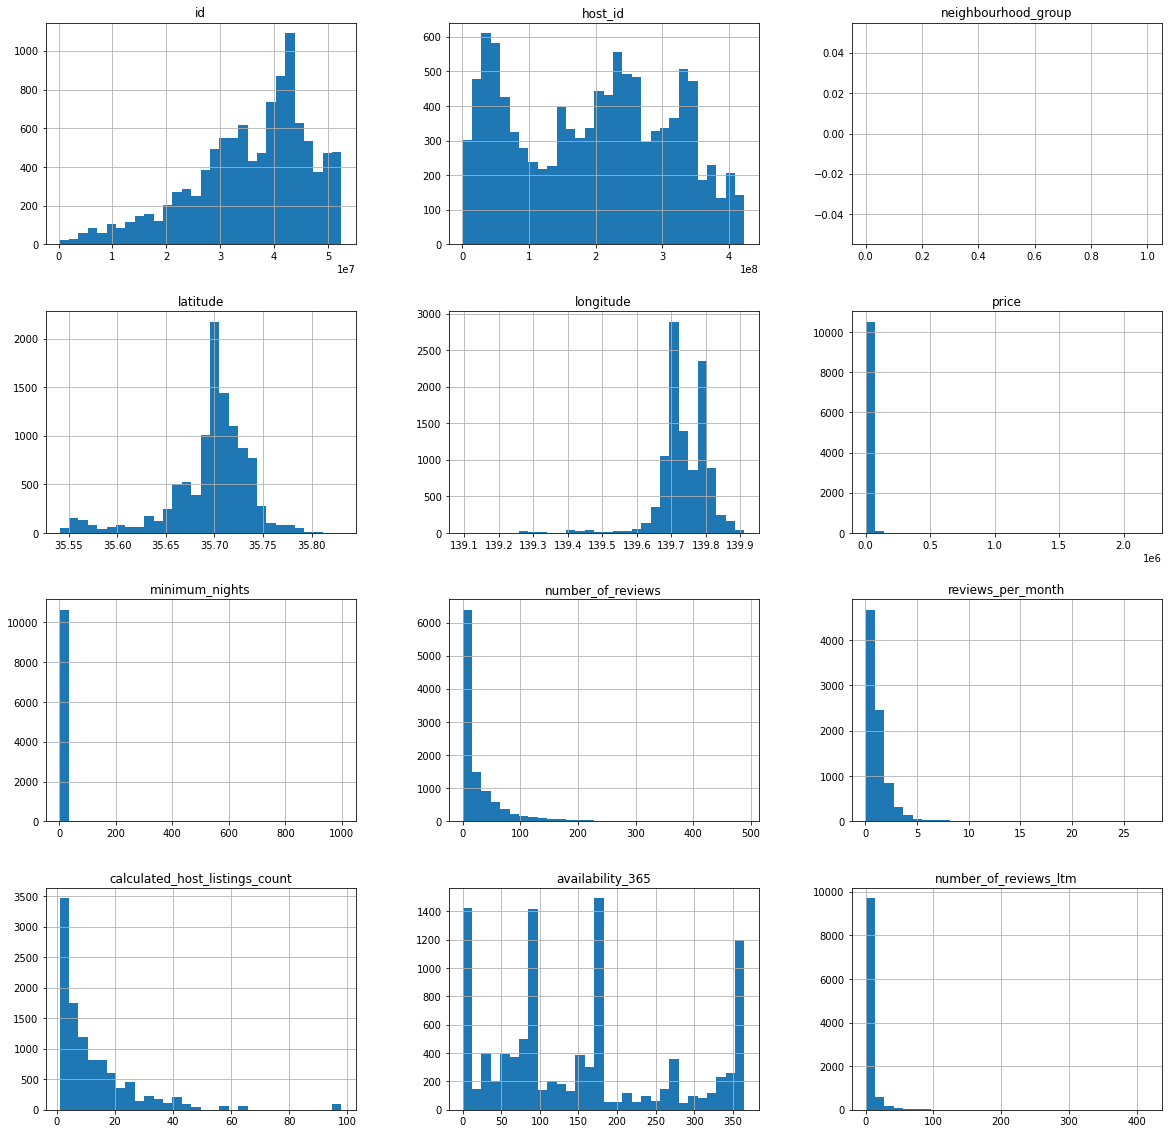

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 30, figsize=(20,20));

###**Existem *ouliers* presentes?**

<center><img alt="detetive" width="60%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/detetive2.png"></center>






 A partir dos histogramas acima, podemos notar ocorrências de valores muito discrepantes em nossa distribuição, podendo assim indicar que estamos lidando com *outliers*. 
Existem formas rápidas para detectar esses dados. Como por exemplo\:
* Resumo estatístico pelo método `describe()`.
* Plotar `boxplots` para as variáveis investigadas.


#### Utilizando o método `describe()` 

In [ ]:
# vamos mostrar o resumo estatístico de nossas variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.067000e+04,10670.000000,10670.000000,8582.000000,10670.000000,10670.000000
mean,1.281379e+04,3.594283,27.172727,1.127977,12.671415,152.890347
std,4.241447e+04,24.674502,44.159342,1.237049,14.362714,117.847991
min,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000
25%,4.257000e+03,1.000000,1.000000,0.360000,3.000000,62.000000
50%,7.000000e+03,1.000000,9.000000,0.830000,8.000000,129.000000
75%,1.237550e+04,2.000000,34.000000,1.480000,17.000000,237.000000
max,2.185000e+06,999.000000,489.000000,27.310000,98.000000,365.000000


> A partir do resumo estatístico acima, podemos confirmar a nossa suspeita sobre a presença de *outliers*, como por exemplo:
* A variável `price` possui um valor nulo para o aluguel, o que não faz sentido do ponto de vista de negócio. Além disso, o valor máximo está muito elevado em relação à mediana, o que pode ser um indicativo que estamos lidando com um *outlier* que, se não tratado, poderá enviesar drasticamente nossa análise.
* A variável `minimum_nights` possui valor superior aos 365 dias do ano.
* Em `reviews_per_month` podemos ver que 75% dos valores estão abaixo de 1.48, porém seu valor máximo é de 27.31

#### Mas...como reconhecer **objetivamente** um *outlier*?

É de grande importância identificar/classificar e limpar esses pontos discrepantes, visto que eles podem mostrar conclusões equivocadas e enviesadas sobre o nosso conjunto de dados. Por isso, apesar da visualização estatística dos dados com o método `describe()` e da visualização gráfica das variáveis com os histogramas, **se fazem necessárias estratégias com maior embasamento técnico e com maior objetividade**, como por exemplo: 

* IQR Score
* Boxplots
* Scatter Plots
* Z-Score

Utilizaremos aqui as duas primeiras técnicas para tratar nossos *outliers*. Clique nos hiperlinks caso queria saber mais sobre o [IQR Score](https://pt.wikipedia.org/wiki/Amplitude_interquartil) e [Boxplots](https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review)

### **Quais técnicas utilizaremos para  limpeza dos *outliers*?**

Utilizaremos aqui as duas primeiras técnicas para tratá-los.


#### Utilizando o IQR Score
Vamos lembrar o que é o IQR. Basicamente, IQR (do inglês, *Interquartile Range*) corresponde à distância entre o Terceiro Quartil (75%) e Primeiro Quartil (25%). Portanto, **IQR = Q3 - Q1**.

<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="60%"></p>


 Além disso, os limiares seguem as expressões a seguir:

* **"Limiar Máximo" = Q3 + 1.5 * IQR**
* **"Limiar Mínimo" = Q1 - 1.5 * IQR**

Logo, seguiremos a seguinte sequência de etapas: 
* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.



##### Identificando ouliers para variável `price`

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  8118.5
Limite superior de price:  24553.25
Limite inferior de price:  -7920.75


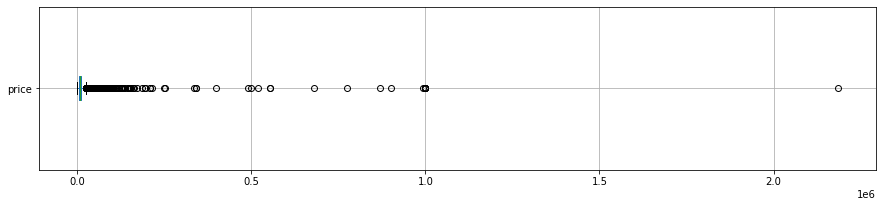

In [ ]:
df.boxplot(column='price', vert=False, figsize=(15,3));

In [ ]:
# constatando relevância percentual dos valores acima de nosso limiar superior
num_out = df[df.price > sup_price].shape[0]
print(f"Temos {num_out} entradas com valores acima de {sup_price}.")
print(f"Percentualmente, valendo {(num_out/df.shape[0])*100}%")

Temos 864 entradas com valores acima de 24553.25.
Percentualmente, valendo 8.09746954076851%


##### Identificando ouliers para variável `reviews_per_month`

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_reviews_per_month = df.reviews_per_month.quantile(.25)
q3_reviews_per_month = df.reviews_per_month.quantile(.75)
IQR_reviews_per_month = q3_reviews_per_month - q1_reviews_per_month
print('IQR da variável reviews_per_month: ', IQR_reviews_per_month)

# definindo os limites                                       
sup_reviews_per_month = q3_reviews_per_month + 1.5 * IQR_reviews_per_month
inf_reviews_per_month = q1_reviews_per_month - 1.5 * IQR_reviews_per_month

print('Limite superior de reviews_per_month: ', sup_reviews_per_month)
print('Limite inferior de reviews_per_month: ', inf_reviews_per_month)

IQR da variável reviews_per_month:  1.12
Limite superior de reviews_per_month:  3.16
Limite inferior de reviews_per_month:  -1.3200000000000003


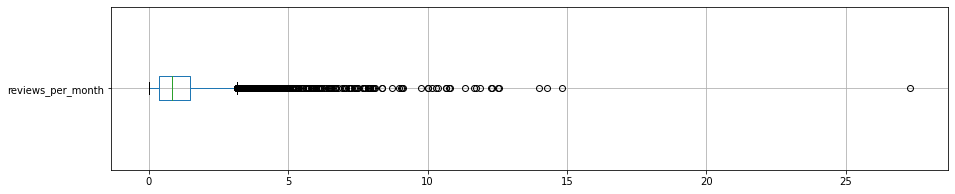

In [ ]:
df.boxplot(column='reviews_per_month',vert=False, figsize=(15,3));

In [ ]:
# constatando relevância percentual dos valores acima de nosso limiar superior
num_out = df[df.reviews_per_month > sup_reviews_per_month].shape[0]
print(f"Temos {num_out} entradas com valores acima de {sup_reviews_per_month}.")
print(f"Percentualmente, valendo {(num_out/df.shape[0])*100}%")

Temos 441 entradas com valores acima de 3.16.
Percentualmente, valendo 4.133083411433927%


##### Identificando ouliers para variável `minimum_nights`

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  1.0
Limite superior de minimum_nights:  3.5
Limite inferior de minimum_nights:  -0.5


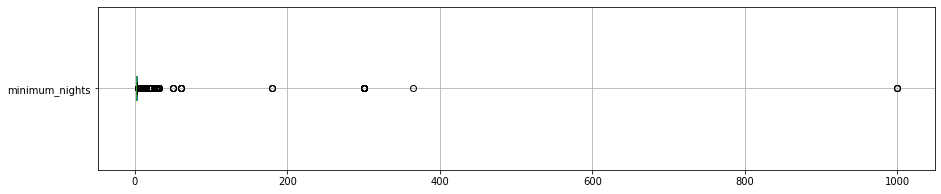

In [ ]:
df.boxplot(column='minimum_nights',vert=False, figsize=(15,3));

In [ ]:
# constatando relevância percentual dos valores acima de nosso limiar superior
num_out = df[df.minimum_nights > sup_minimum_nights].shape[0]
print(f"Temos {num_out} entradas com valores acima de {sup_minimum_nights}.")
print(f"Percentualmente, valendo {(num_out/df.shape[0])*100}%")

Temos 764 entradas com valores acima de 3.5.
Percentualmente, valendo 7.160262417994377%


### **Limpeza dos *outliers***

Temos aqui uma situação de *trade off* entre **quantidade** e **qualidade** dos dados, na medida em que apesar de possuir um menor número de entradas, o nosso *dataset* filtrado possui um conjunto de dados de melhor qualidade e com uma quantidade significativa de entradas, possibilitando assim uma melhor análise.

<center><img alt="trade-off" width="60%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/trade-off.png"></center>

Para realizar tal limpeza usaremos o método `drop()` (apesar de existirem inúmeras [outras opções](https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe) com o pacote Pandas).
Além disso, podermos também retirar a coluna `neighbourhood_group`, que está recheada de valores ausentes.


In [ ]:
# remover outliers do nosso DataFrame e alocar dados filtrados em outro DataFrame
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > sup_price].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.reviews_per_month > sup_reviews_per_month].index, axis = 0, inplace = True)

# remover a coluna "neighbourhood_group", pois está vazia
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

# vamos conferir a nova dimensionalidade do nosso DataFrame
print(f" O DataFrame antigo possui dimensões: {df.shape}")
print(f" O nosso DataFrame filtrado possui dimensões: {df_clean.shape}")


 O DataFrame antigo possui dimensões: (10670, 18)
 O nosso DataFrame filtrado possui dimensões: (8696, 17)


#### Histogramas sem *outliers* 



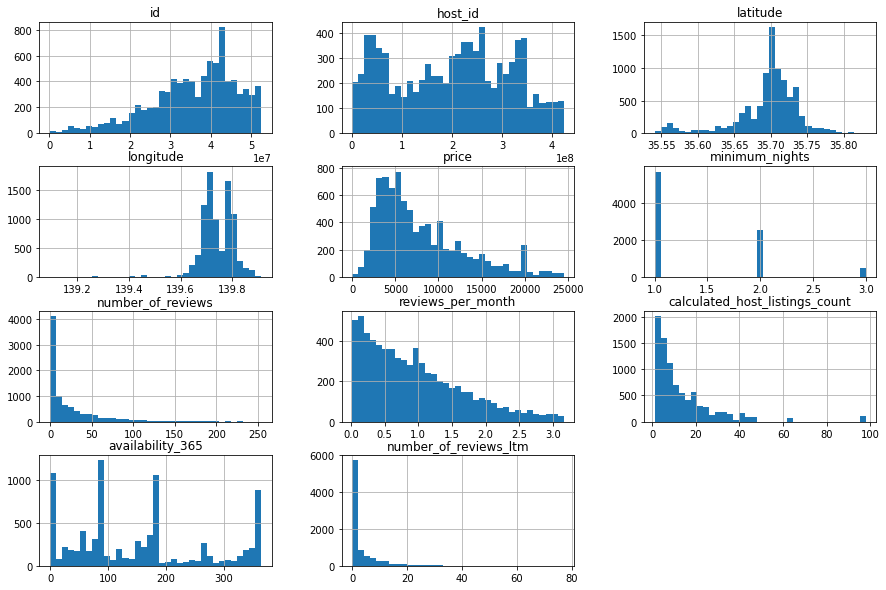

In [ ]:
# vamos plotar histogrmas sem outliers
df_clean.hist(bins=35, figsize=(15,10));

### **Qual a média dos preços de aluguel?**
Agora vamos falar de algo bem relevante: **preços**. Mais precisamente, vamos ver qual é a media do preço de aluguel de imóveis em Tokyo.


*   A média da coluna `price` aponta um valor médio de **U$ 8033.5** por aluguel! 

<center><img alt="Criança_Surpresa" width="40%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/crianca_surpresa.jpg"></center>




In [ ]:
# ver a média da coluna price
df_clean.price.mean()

8033.509659613615

###**Qual a correlação existente entre as variáveis**
> **Correlação** pode ser entendida como uma métrica para a relação entre coisas. Nessa análise, vamos verificar as relações entre duas variáveis.

> Para quantificar essa correlação, podemos usar o coeficiente de correlação, que é um valor limitado entre 0 (indicando nenhuma correlação) e 1 (indicando máxima correlação).

> Para melhorar a visualização sobre esse coeficiente, usarei das seguintes ferramentas\: 

*   Criar uma matriz de correlação
*   Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.


In [ ]:
# criar uma matriz de correlação
correlation = df_clean[['price','minimum_nights','number_of_reviews', 'reviews_per_month', 'availability_365','number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
correlation

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
price,1.000000,-0.038810,0.000659,0.001667,-0.048968,-0.067985
minimum_nights,-0.038810,1.000000,0.119937,0.034024,0.060010,-0.012315
number_of_reviews,0.000659,0.119937,1.000000,0.748383,0.028652,0.304067
reviews_per_month,0.001667,0.034024,0.748383,1.000000,-0.001650,0.561551
availability_365,-0.048968,0.060010,0.028652,-0.001650,1.000000,-0.006533
number_of_reviews_ltm,-0.067985,-0.012315,0.304067,0.561551,-0.006533,1.000000


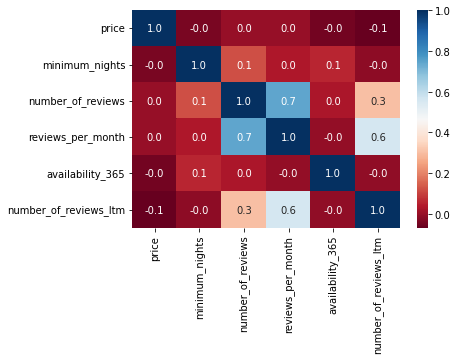

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlation, cmap='RdBu',fmt='.1f', annot=True);

 Através da matriz acima, podemos notar as seguintes correlações entre variáveis do nosso *dataset* (lembre-se que 1 e 0 são nossos valores máximos e mínimos): 

*   `number_of_reviews_ltm` e `number_of_reviews`, com 0.3
*   `number_of_reviews_ltm` e `reviews_per_month`, com 0.6
*   `reviews_per_month` e `number_of_reviews`, com 0.7

 As variáveis apresentadas contabilizam o número de revisões/avaliações sobre imóveis em diferentes espaços de tempo, o que torna a correlação entre as variáveis plausível, na medida em que são similares em certa instância. 


### **Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna `room_type()` em nosso *dataset* representa o tipo de imóvel alugado. Vamos investigar quais os valores e as relevâncias percentuais de cada um desses tipos!

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    7253
Private room       2616
Shared room         404
Hotel room          397
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df.room_type.value_counts()/df.shape[0]).head(5)

Entire home/apt    0.679756
Private room       0.245173
Shared room        0.037863
Hotel room         0.037207
Name: room_type, dtype: float64

 Em primeiro lugar, com esmagadores **67.97%**, os **apartamentos/casas são o tipo de imóvel mais alugado em Tokyo**. Em segundo lugar, temos os quartos privados, com **24.52%**, e por fim em terceiro lugar temos os quartos compartilhados, que superaram por pouco os quartos de hotel, com **3.78%** e **3.72%**, respectivamente. 

<center><img alt="Podio" width="50%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/podio_novo.png"></center>




#### **Qual a média de preço por tipo de imóvel alugado?**

Uma forma de agrupar entradas do mesma coluna é utilizando o método `groupby()`. Com isso, podemos  aqui comparar os **preços médios dos imóveis por tipo de imóvel**.

In [ ]:
df_clean.groupby(['room_type']).price.mean().sort_values(ascending = False).head(4)

room_type
Hotel room         10334.791209
Entire home/apt     8295.320368
Private room        7668.271186
Shared room         3421.516616
Name: price, dtype: float64

Como esperado, o valor de aluguel da moradia compartilhada é consideravelmente menor do que os outros tipo de imóvel (casa, apartamento, quarto privado), atingindo uma média de U$ 3421.52.

### **Qual a localidade mais cara do dataset?**



Novamente, utilizaremos aqui o método `groupby()`, porém dessa vez iremos comparar e visualizar graficamente os **preços médios dos imóveis por bairro.**

In [ ]:
# ver preços por bairros, na média
agrupados_por_preco = df_clean.groupby(['neighbourhood']).price

In [ ]:
media_bairros_caros = agrupados_por_preco.mean().sort_values(ascending=False).head(10)
print(media_bairros_caros)

neighbourhood
Musashino Shi    11643.000000
Mitaka Shi       11427.200000
Meguro Ku         9619.675676
Shibuya Ku        9590.393593
Kodaira Shi       9494.333333
Taito Ku          9437.533944
Minato Ku         9327.864078
Chiyoda Ku        9312.557971
Edogawa Ku        9093.871212
Koganei Shi       8909.000000
Name: price, dtype: float64


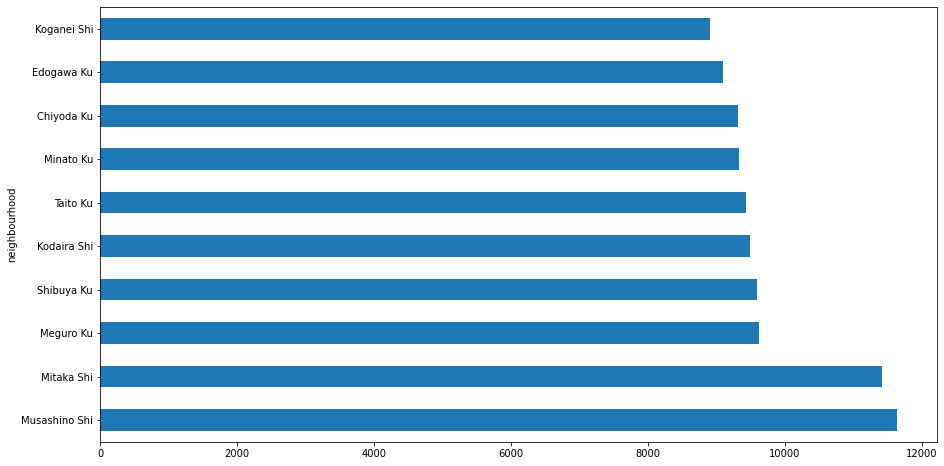

In [ ]:
media_bairros_caros.plot(kind = 'barh', figsize=(15,8));

> De acordo com nosso *dataset*, o bairro mais caro de Tokyo seria Musashino Shi, com preço médio de aluguel de $11643, valor que supera em aproximadamente 50% o valor médio de aluguel calculado previamente.

> Contudo, é **importante nos certificar de que nossa análise de preço médio não está enviesada por imóveis caros com pouca representatividade numérica** , por isso vamos verificar o número de imóveis localizados nos bairros mais caros de Tokyo, segundo o *dataset* utilizado.



In [ ]:
print(df_clean[df_clean.neighbourhood == 'Musashino Shi'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Mitaka Shi'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Meguro Ku'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Shibuya Ku'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Aoyama'].shape[0])



4
5
37
437
0


> Podemos ver, pelo número de imóveis em Musashino Shi e Mitaka Shi, que esses dados não são expressivos em relação ao tamanho de nosso *dataset*. 

> **Em contrapartida, o número de aluguéis disponíveis em Meguru Ku e Shibuya Ku trazem mais segurança em relação a representatividade do nosso conjunto de dados. Essas localidades possuem altos valores de aluguel, com preço de 9619.67 e 9590.39 dólares, respectivamente.**

<center><img alt="like" width="30%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/like.png"></center>

#### Importante questionar...
> Contudo, é possível que, após algumas pesquisas sobre os "bairros mais caros de Tokyo"  você tenha a seguinte dúvida: "Quando pesquiso em sites de busca sobre localidades caras em Tokyo, os nomes contemplados em sua análise não aparecem. O que pode estar acontecendo? Sua análise está de fato correta?".




<center><img alt="desconfiado" width="50%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/desconfiado1.png"></center>


> Vale mencionar que estamos aqui limitados pelo *dataset* disponibilizado pelo portal [Inside AirBnb](http://insideairbnb.com/get-the-data.html), dessa forma é razoável afirmar que **alguns bairros luxosos de Tokyo não foram comtemplados aqui**, como por exemplo Aoyama, que não possui imóveis disponíveis para aluguel em banco de dados, como verificado nas duas últimas linhas da célula de código acima.

> Além disso, existe um fator cultural que deve ser levado em consideração: o conservadorismo da sociedade japonesa. Diante do grande aumento de visitantes estrangeiros no país, desde 2013, o crescimento exponencial de ofertas de aluguel para residências privadas incomodou muitos moradores nativos e empresas do setor hoteleiro. Tal fricção, acabou se desdobrando em ações regulatórias, compondo a "Lei Minpaku", que apesar de oferecer mais protocolos de segurança para os viajantes, acabou reduzindo o número de pessoas dispostas a oferecer o aluguel via Airbnb. Portanto, se configura como causa provável para ausência de algumas regiões de Tokyo em nosso conjunto de dados.

Agora vamos em busca de uma análise mais visual, plotando um *heatmap* dos preços dos imóveis em função de suas coordenadas de **latitude** e **longitude**.

<center><img alt="latitude e longitude" width="50%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/latitude_longitude.png"></center>

OBS: Se você acha que essa análise não faz sentido por acreditar que a terra é plana, por favor [clique aqui](https://www.youtube.com/watch?v=T4WjyTV98lg).

#### Mapa de calor dos preços dos imóveis em função de latitude e longitude 

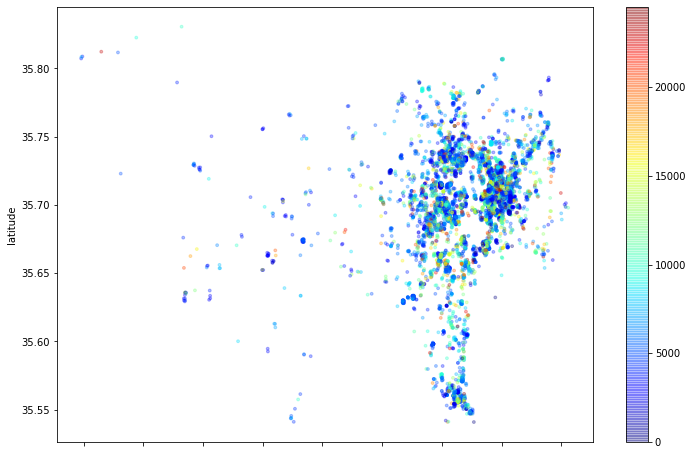

In [ ]:
# plotar os imóveis pela latitude e longitude
df_clean.plot.scatter(x = 'longitude', y = 'latitude', alpha = 0.3, s=8,
                      c = df_clean.price, colormap ='jet',figsize=(12,8));

> Vamos investigar mais a fundo a variável `price`, assim com o `boxplot` abaixo poderemos concluir a percentagem de entradas com preço abaixo do limiar superior calculado  acima com base no IQR, dando assim uma melhor ideia sobre a representação do nosso *dataset* no gráfico acima.


Temos 9806 entradas com valor abaixo de 24553.25.
Percentualmente, valendo 91.90253045923149%


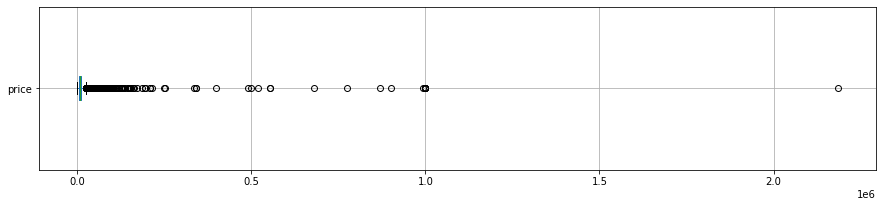

In [51]:
df.boxplot(column = 'price', vert = False, figsize=(15,3));
num_imoveis = df[df.price < sup_price].shape[0]
print(f"Temos {num_imoveis} entradas com valor abaixo de {sup_price}.")
print(f"Percentualmente, valendo {num_imoveis/df.shape[0]*100}%")

Nota-se uma excelente representatividade para o gráfico plotado, comtemplando aproximadamente 92% do nosso conjunto de dados.

### **Qual é a média e relevância percentual dos valores para o mínimo de noites para aluguel (minimum_nights)?**

Vamos extrair a relevância percentual dos valores para coluna `minimum_nights`. 

In [ ]:
(df_clean.minimum_nights.value_counts().sort_values(ascending=False))/df_clean.shape[0]

1    0.650644
2    0.291398
3    0.057958
Name: minimum_nights, dtype: float64

Podemos também extrair do nosso *dataset* a média do número mínimo de noites para reserva, através da inspeção da média da coluna `minimum_nights`.

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

1.407313707451702

Vemos que a média de noites mínimas calculada é de aproximadamente 1.41, o que pode induzir à conclusão de que os anfritiões buscam alugar um período intermediário entre um e dois dias. Isso pode ser reafirmado pela relevância percentual acima, em que o **aluguel de 1 e 2 dias são os mais relevantes**, com 65.06% e 29.14%, respectivamente.

## Conclusões

<center><img alt="Tokyo" width="20%" src="https://raw.githubusercontent.com/Pedro1-21GW/sigmoidal/main/bandeira_chegada.png"></center>


> Foi possível realizar uma análise superficial com base em um *dataset* resumido, fornecido pelo portal do Airbnb. Ainda assim, identificamos uma série de informações e *insights* interessantes sobre aluguéis de imóveis em Tokyo.

> Vale mencionar que identificamos a presença de *outliers*, os famosos "pontos fora da curva", que podem distorcer conclusões e informações estatísticas. Logo, foi empregada uma técnica de tratamento desses dados para trazer maior confiabilidade à nossa análise.

> Futuramente, em uma próxima análise exploratória, buscarei utilizar o *dataset* completo, com 106 atributos, para obtenção de conclusões e *insights* com embasamento ainda mais aprofundado.